In [3]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np  
import tensorflow as tf  

df = pd.read_csv("insubete-dataset.csv", sep=";")
rng = np.random

df

,Meal,Insulin,IG
0,glucose (male),11,100
1,glucose (female),12,100
2,Medium GI breakfast,6,60
3,High GI breakfast,6,80
4,White bread,9,71
5,Sourdough rye bread,9,70
6,High GI breakfast 2,11,79
7,low GI breakfast,3,28
8,bovine milk,3,30
9,casein drink,3,30


In [4]:
#Datacleaning : Now we clean our dataset before working on it
to_drop=['Meal']
df.drop(to_drop, axis = 1, inplace = True)

df.isnull().sum
df = df.dropna(axis = 0)
    
df

,Insulin,IG
0,11,100
1,12,100
2,6,60
3,6,80
4,9,71
5,9,70
6,11,79
7,3,28
8,3,30
9,3,30


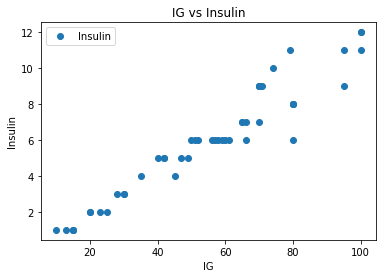

In [5]:
#Build our linear model

#Load features into a variable named X
X = df['IG'].values.reshape(-1,1)

#Load y, the value that we'll predict
y = df['Insulin'].values.reshape(-1,1)

#To visualize our data before training model
df.plot(x='IG', y='Insulin', style='o')  
plt.title('IG vs Insulin')  
plt.xlabel('IG')  
plt.ylabel('Insulin')  
plt.show()

In [6]:
#Spliting data into two parts : train and test
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print("train set shape: ", X_train.shape, y_train.shape)
print("test set shape: ", X_test.shape, y_test.shape)

(48, 1)
(48, 1)
train set shape:  (38, 1) (38, 1)
test set shape:  (10, 1) (10, 1)


In [7]:
#Now we have data for training and testing
#We are gonna build our model with tensorflow
#y = Wx + b
W = tf.Variable(rng.randn(), dtype=tf.float32, name='W')
b = tf.Variable(rng.randn(), dtype=tf.float32, name='b')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#Creation of a placeholder for values x and y_input
#we will feed it in our model equation to train and predict values of y_output (insulin)
x = tf.placeholder(dtype=tf.float32, name='x')
y_input = tf.placeholder(dtype=tf.float32, name='y_input')

In [9]:
# y_output = W * x + b
y_output = tf.add(x=tf.multiply(x=W, y=x, name='multiply'), y=b, name='y_output')

In [10]:
loss = tf.reduce_mean(input_tensor=tf.square(x=y_output-y_input), name='loss')

In [11]:
#optimizer will optimize errors measured by loss function by using GradientDescentd
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001, name='optimizer')
train_step = optimizer.minimize(loss)
saver = tf.train.Saver()

Instructions for updating:
Use tf.cast instead.


In [12]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [13]:
# write shape of the graph
tf.train.write_graph(graph_or_graph_def=session.graph_def,
                     logdir='.',
                     name='linear_regression.pb',
                     as_text=False)

'./linear_regression.pb'

In [14]:
loss_before_training = session.run(fetches=loss, feed_dict={x: X_train, y_input: y_train})
print("Loss before training is : ", loss_before_training)

Loss before training is :  4078.1406


In [15]:
for _ in range(1000):
    session.run(fetches=train_step, feed_dict={x: X_train, y_input: y_train})


In [16]:
# save a checkpoint after training
saver.save(sess=session, save_path='./linear_regression.ckpt')

'./linear_regression.ckpt'

In [17]:
print(session.run(fetches=[loss, W, b], feed_dict={x: X_train, y_input: y_train}))

[0.87258226, 0.110817865, -0.08972038]


In [21]:
#Now the model is trained and ready for making predictions
#We have to test it in order to evaluate its performance and precision
#We will compare predicted values with values of the dataset provided only for testing

print("Predicted values ","\n", session.run(fetches=y_output, feed_dict={x: X_test}))
print("\t")
print("Test values are ","\n", y_test)


Predicted values  
 [[ 3.7889047]
 [ 2.4590905]
 [ 6.337716 ]
 [ 7.224259 ]
 [ 4.8970838]
 [10.992065 ]
 [ 7.113441 ]
 [ 3.2348154]
 [ 1.0184582]
 [ 7.66753  ]]
	
Test values are  
 [[ 4]
 [ 2]
 [ 6]
 [ 7]
 [ 4]
 [12]
 [ 7]
 [ 3]
 [ 1]
 [ 9]]
